# Exercise 5.19: Diffraction gratings

Light with wavelength$\lambda$ is incident on a diffraction grating of total width $w$,  gets diffracted, is focused with a lesn of focal length $f$, and falls on a screen.

Theory tells us that the intensity of the diffraction pattern on the screen, a distance $x$ from the central axis of the system, is given by

$$ I(x) = \bigg|\int^{w/2}_{w/2} \sqrt{q(u)}e^{i2\pi xu/\lambda f}\text{d}u\bigg|^2,$$


where $q(u)$ is the intensity transmission function of the diffraction grating at a distance $u$ from the central axis, i.e., the fraction of the incident light that grating lets through.

a) Consider a grating with transmission function $q(u)=sin^2 \alpha u$. What is the seperation of the "slits" in this grating, expressed in terms of $\alpha$?

Note that the transmission function is a squared sine wave, the function will have a periodicity of $T=\pi/\alpha$. When the function is positioned at a grate it will have maximum intensity so the grating spacing then becomes:

$$ d = \frac{\pi}{\alpha} $$

b) Write a Python function q(u) that returns the transmission function $q(u) = sin^2 \alpha u$ as above at position $u$ for a grating whose slits have seperation $20 \mu\text{m}$.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def q(u):
    '''
    Returns the transmission function for a grating with a seperation of slits of 20um
    '''
    d = 20e-6
    alpha = np.pi/d
    return np.sin(alpha*u)**2

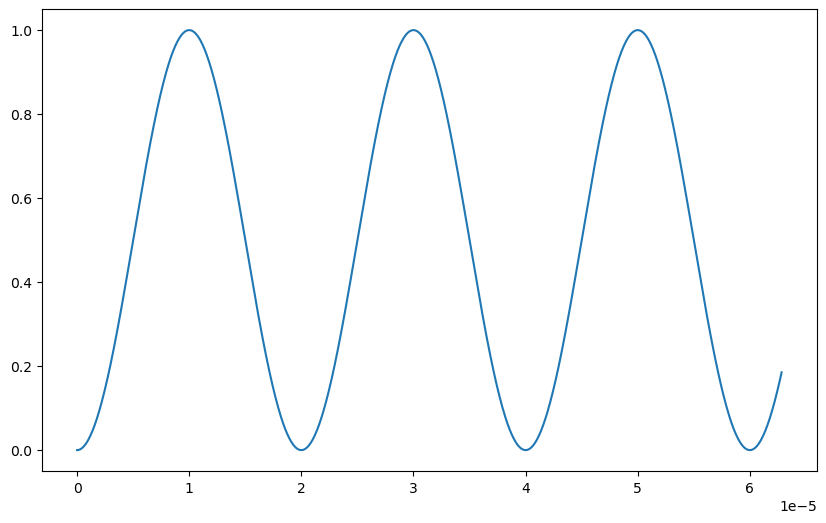

In [16]:
u = np.linspace(0, np.pi*20e-6, 1000)
y = q(u)

plt.figure(figsize=(10,6))
plt.plot(u,y)
plt.show()

c) Use your function in a program to calculate and graph the intensity of the diffraction pattern produced by such a grating having ten slits in total, if the incident light has wavelength $\lambda=500\;\text{nm}$. Assume the lens has a focla length of 1 meter and the screen is 10 cm wide. you can use whaever method you think approiate for doing the integral. Once you've made your choice you'll also need to decide the number of sample points you'll use. What criteria play into this decision?

Notice that the integrand in the equation for $I(x)$ is complex, so you will have to use complex variables in your program. As mentioned in Section 2.2.5, there is a version of the math package for use with complex variables callled cmath. In particular you may find the exp function from cmath useful because it can calculate the exponentials of complex arguments.

In [17]:
# Let's use simpson's rule given that the function is complex,
# and I'm not sure how gaussian quadrature works with complex functions

def simpson(f, x, u_start, u_end, N):
    '''
    Uses simpsons'rule to estimate the tinegral for N slices
    '''
    h = (u_end-u_start)/N
    
   
    even, odd = 0, 0
    
    for k in range(1,N):
        if k%2==0:
            even += f(u_start+k*h,x)
        else:
            odd += f(u_start+k*h,x)
    
    I = f(u_start,x) + f(u_end,x) + 4*odd + 2*even
    
    return h*I/3
    

In [18]:
def f(u, x):
    return np.sqrt(q(u))*np.exp(1j*2*np.pi*x*u/(l*focus))

In [19]:
l = 500e-9 # wavelength 500 nm
focus = 1
slits = 10 # number of slits
d = 20e-6 #slit seperation 20 um
alpha = np.pi/d
screen_width = 0.1 # screenwidth
grating_Width = slits*d #grating width

start = -grating_Width/2
end = grating_Width/2

N = 1000

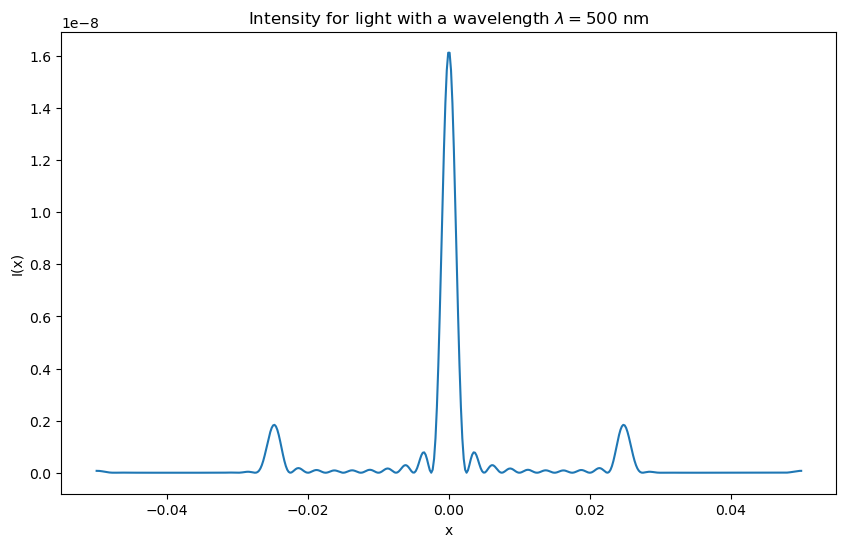

In [20]:
x_range = np.linspace(-0.05, 0.05, 500)
#print(x_range)
I = np.abs(simpson(f, x_range, start, end, N))**2

plt.figure(figsize=(10,6))
plt.plot(x_range, I)
plt.title("Intensity for light with a wavelength $\lambda=500$ nm")
plt.xlabel("x")
plt.ylabel("I(x)")
plt.show()

d) Create a visualization of how the diffraction pattern would look on the screen using a density plot.

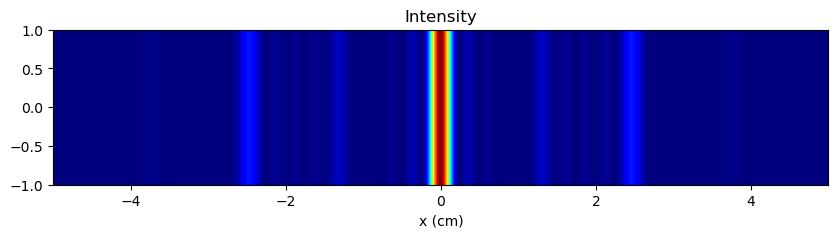

In [29]:
def create_vis_intensity(I):
    
    vis_matrix = np.zeros((len(I), len(I)))

    for k, val in enumerate(I):
        vis_matrix[:,k] = val

    plt.figure(figsize=(10,6))
    plt.imshow(vis_matrix, extent=[-5,5,-1,1])
    plt.title("Intensity")
    plt.xlabel("x (cm)")
    plt.jet()
    #plt.colorbar()
    plt.show()
    

create_vis_intensity(I)

e) Modify your program further to make a pictures of the diffraction patterns produced by gratings with the following profiles:

- A transmission profile that obeys $q(u)=sin^2\alpha u\; sin^2 \Beta u$, with $\alpha$ as before and the same total grating width $w$ and $\Beta=\frac{1}{2}\alpha$.

- Two "square" slits, meaning slits with $100%$ tranmission through the slit and $0%$ transmission everywhere else. Calculate the diffraction pattern for non-identical slits, one $10$ \mu mwide and the other $20 \mu m$ wide, with a $60 \mu m$ gap between the two.

In [26]:
# the adjusted transmission function

def q(u):
    d = 20e-6
    alpha = np.pi/d
    beta = alpha/2
    return np.sin(alpha*u)**2 * np.sin(beta*u)**2

In [31]:
def f(u, x):
    return np.sqrt(q(u))*np.exp(1j*2*np.pi*x*u/(l*focus))

In [32]:
l = 500e-9 # wavelength 500 nm
focus = 1
slits = 10 # number of slits
d = 20e-6 #slit seperation 20 um
alpha = np.pi/d
screen_width = 0.1 # screenwidth
grating_Width = slits*d #grating width

start = -grating_Width/2
end = grating_Width/2

N = 1000


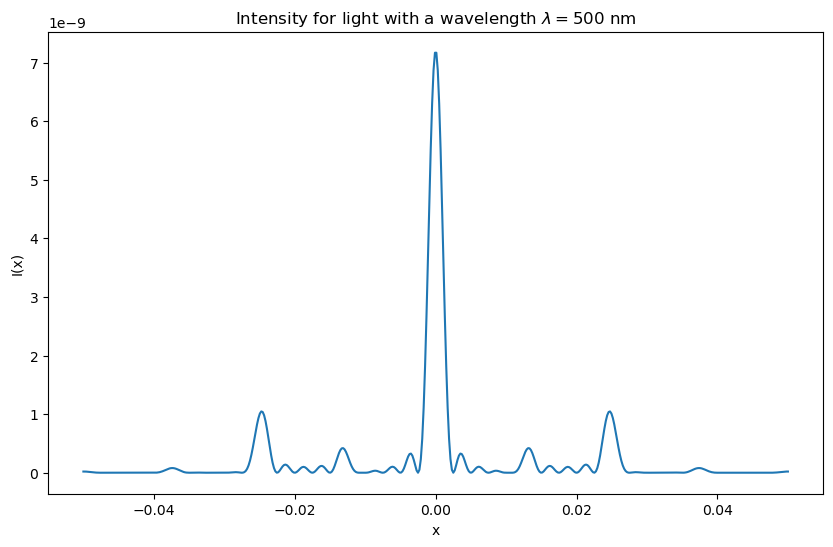

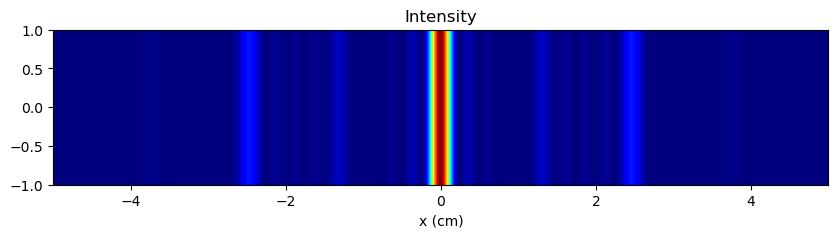

In [33]:
x_range = np.linspace(-0.05, 0.05, 500)
#print(x_range)
I = np.abs(simpson(f, x_range, start, end, N))**2

plt.figure(figsize=(10,6))
plt.plot(x_range, I)
plt.title("Intensity for light with a wavelength $\lambda=500$ nm")
plt.xlabel("x")
plt.ylabel("I(x)")
plt.show()

create_vis_intensity(I)

Now let's go on to modify our transmission function for our last case

Two "square" slits, meaning slits with 100% tranmission through the slit and 0% transmission everywhere else. Calculate the diffraction pattern for non-identical slits, one $10 \mu m$ wide and the other $20 \mu m$ wide, with a $60 \mu m$ gap between the two.

There's only any transmission when we're in front of the slits

In [38]:
l = 500e-9 # wavelength 500 nm
focus = 1
slits = 10 # number of slits
d = 20e-6 #slit seperation 20 um
alpha = np.pi/d
screen_width = 0.1 # screenwidth

grate_1 = 10e-6
grate_2 = 20e-6
grate_sep = 60e-6

grating_Width = grate_1+grate_2+grate_sep #grating width
start = -grating_Width/2
end = grating_Width/2

N = 1000


In [39]:
def f(u,x):
    if (u <= start+grate_1) or (u >= end-grate_2):
        return np.exp(1j*2*np.pi*x*u/(l*focus))
    else: return 0
    

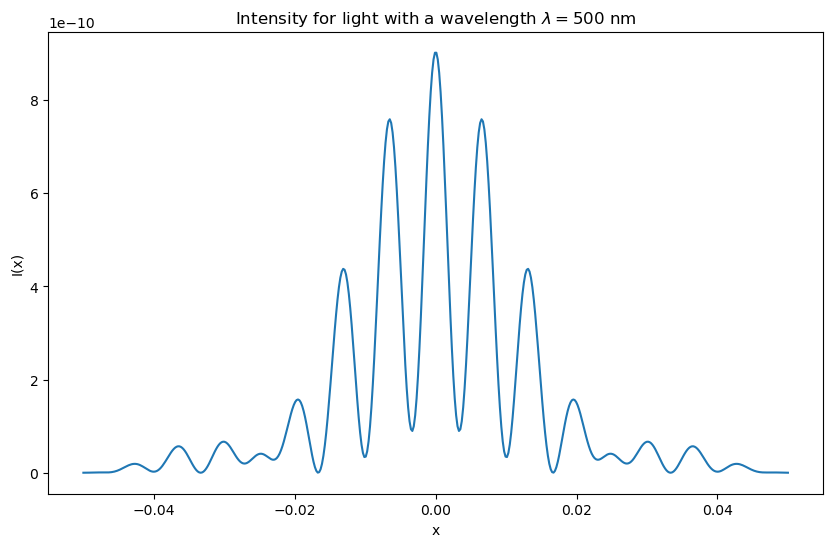

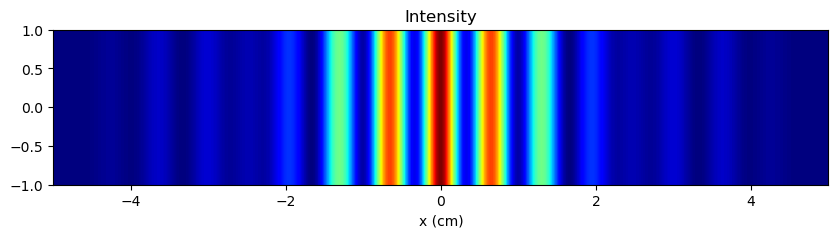

In [40]:
x_range = np.linspace(-0.05, 0.05, 500)
#print(x_range)
I = np.abs(simpson(f, x_range, start, end, N))**2

plt.figure(figsize=(10,6))
plt.plot(x_range, I)
plt.title("Intensity for light with a wavelength $\lambda=500$ nm")
plt.xlabel("x")
plt.ylabel("I(x)")
plt.show()

create_vis_intensity(I)